In [2]:
# Titanic EDA - Exploratory Data Analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df = pd.read_csv("titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Data Cleaning
# Check missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Filling 'Age' with median of not null data
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-10-959dd9e4cda5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [11]:
# Filling 'Embarked' with mode of existing data
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-11-923a19faad41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [12]:
# Drop 'Cabin' as it contains lots of null values
df.drop(columns=['Cabin'], inplace=True)

In [13]:
# Feature Engineering
# Create new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [14]:
# Extract 'Title' from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
# Simplify titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')

In [16]:
df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rare
887,Miss
888,Miss
889,Mr


In [18]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [19]:
df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rare
887,Miss
888,Miss
889,Mr


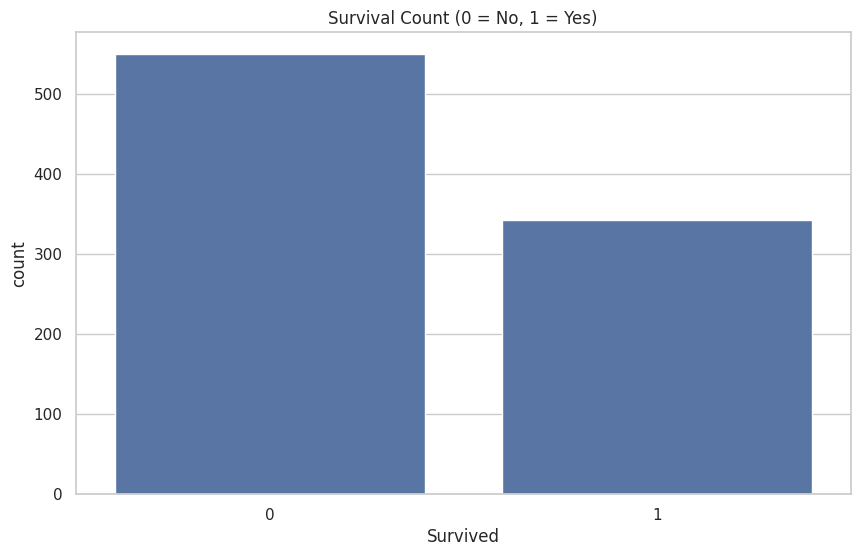

In [20]:
# Survival counts
sns.countplot(data=df, x='Survived')
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

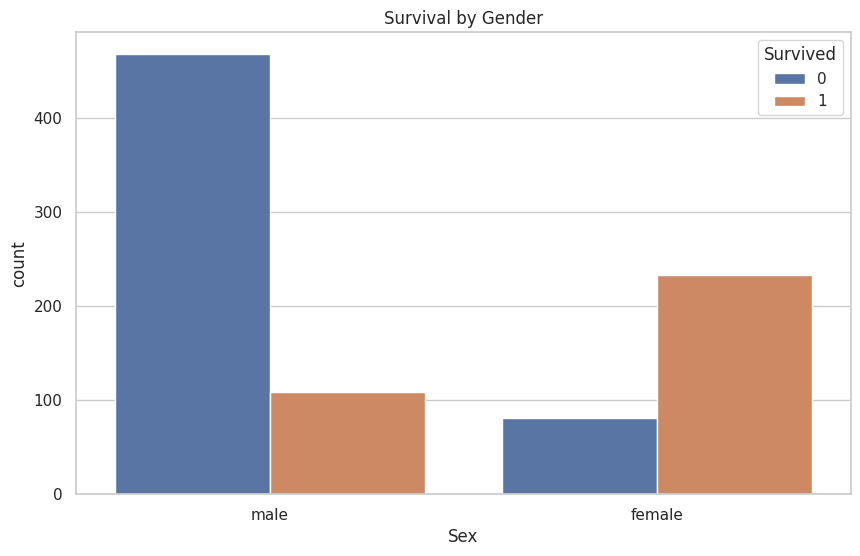

In [21]:
# Survival by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

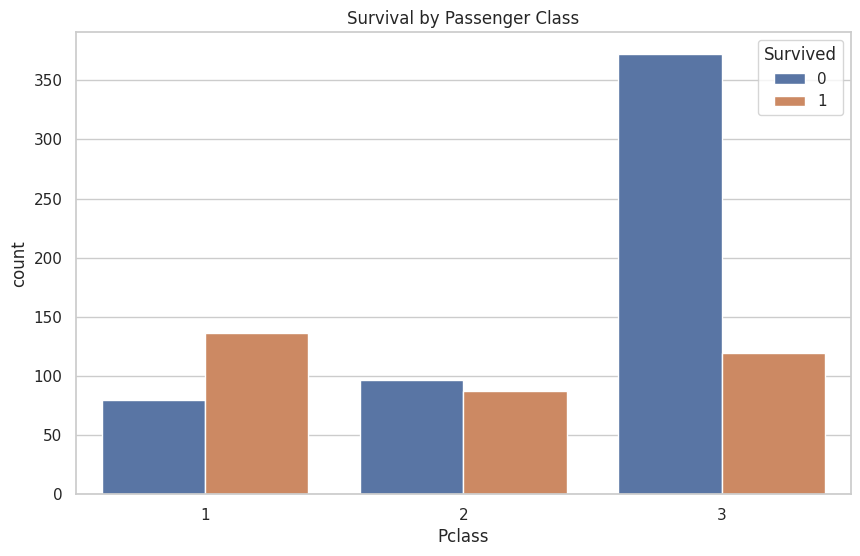

In [22]:
# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

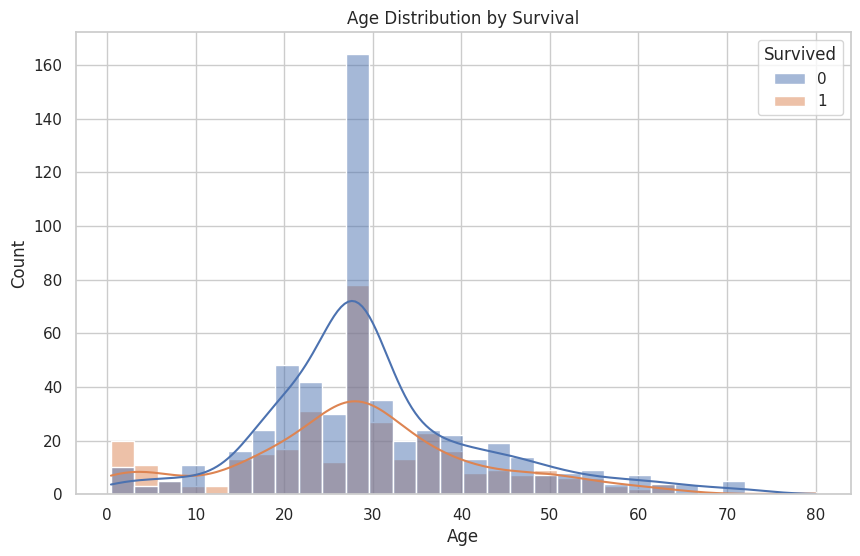

In [23]:
# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

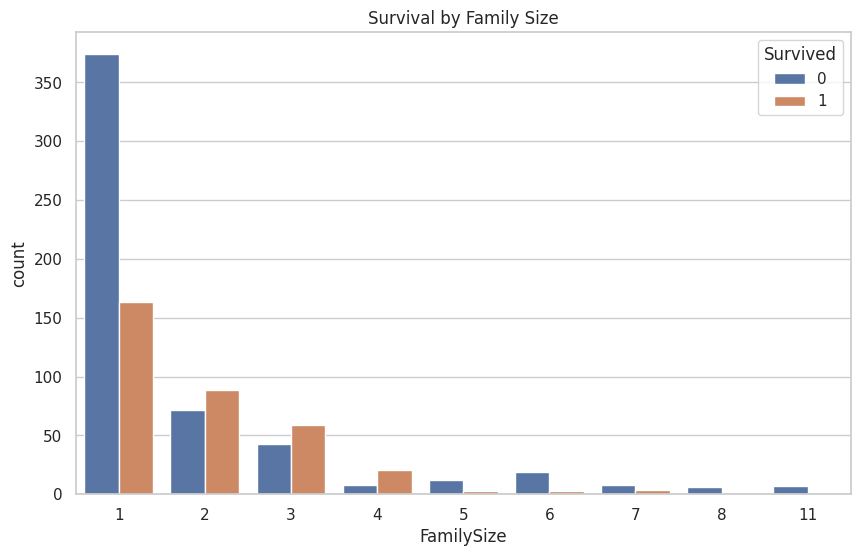

In [24]:
# Family size vs survival
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title("Survival by Family Size")
plt.show()

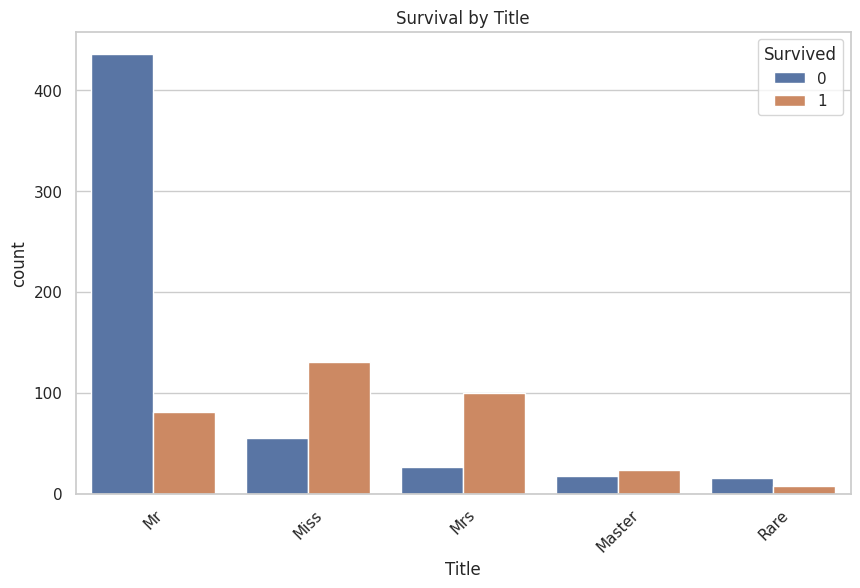

In [25]:
# Title vs survival
sns.countplot(data=df, x='Title', hue='Survived', order=df['Title'].value_counts().index)
plt.title("Survival by Title")
plt.xticks(rotation=45)
plt.show()

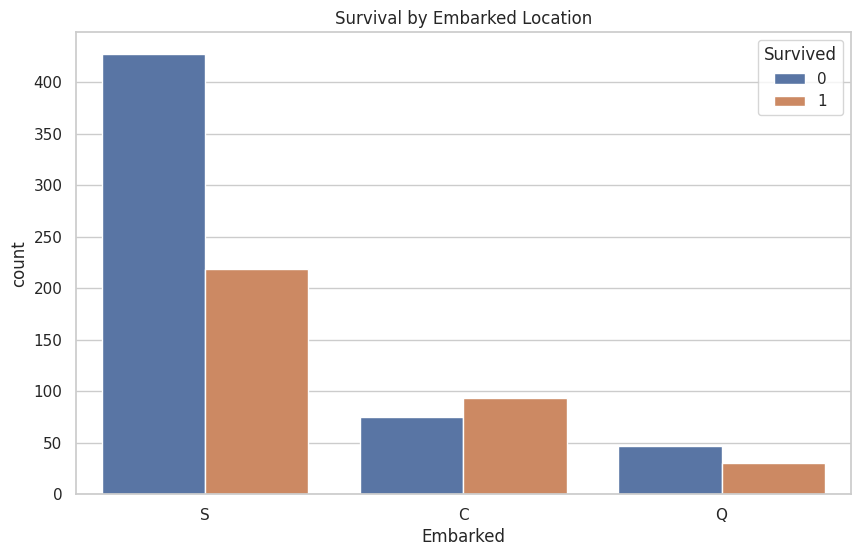

In [26]:
# Embarked vs survival
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Survival by Embarked Location")
plt.show()

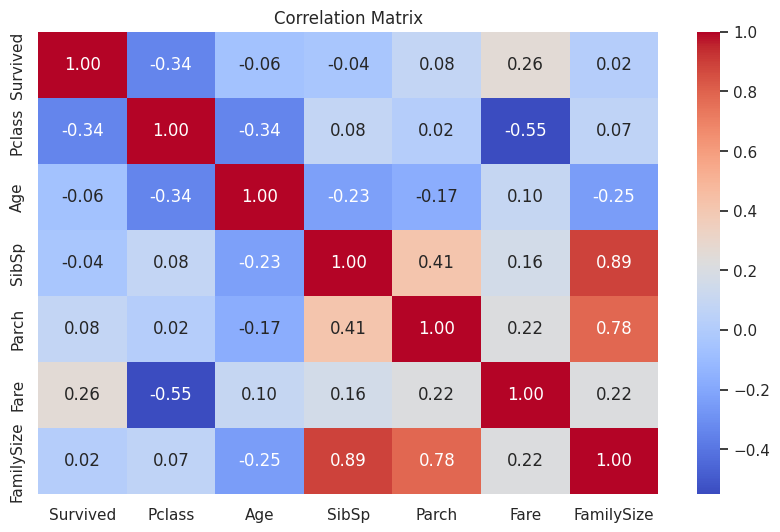

In [27]:
# Correlation heatmap
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:
# Summary
print("\nEDA complete! Key insights include:")
print("- Females had a much higher survival rate.")
print("- 1st class passengers had better survival chances.")
print("- Family size and titles provide additional insight into survival patterns.")


EDA complete! Key insights include:
- Females had a much higher survival rate.
- 1st class passengers had better survival chances.
- Family size and titles provide additional insight into survival patterns.
